<a href="https://colab.research.google.com/github/sejii93/Probability-Model/blob/main/Exponential_Smoothing_2019_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
df = pd.read_csv('/content/drive/MyDrive/probability model/Passenger data_intl_2019.csv',parse_dates=['date'],index_col='date')
                 
df.head(5)

,Intl pax
date,
2019-01-01,1183719
2019-02-01,1070895
2019-03-01,1129962
2019-04-01,1156786
2019-05-01,1161847


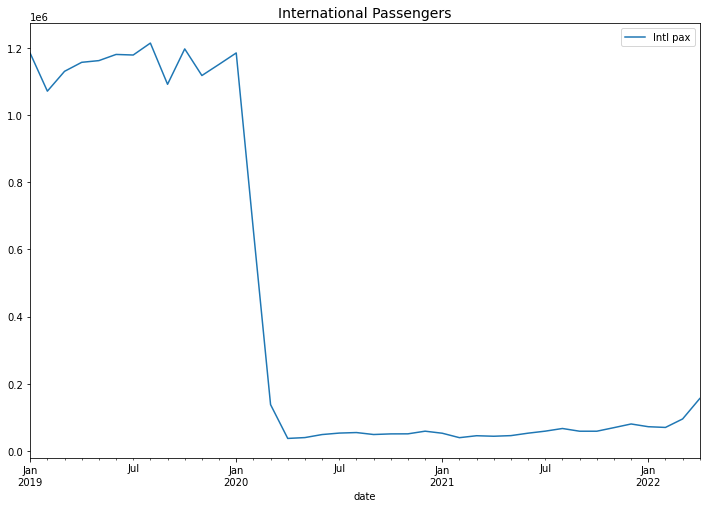

In [134]:
## time series plot
df.plot(figsize=[12,8])
plt.title('International Passengers', fontsize=14)
plt.show()

In [137]:
## split between the training and the test data sets. 
## The last 12 periods form the test data
df_train = df.iloc[:-4]
df_test = df.iloc[-4:]

In [138]:
## exponential smoothing in Python
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [139]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(df_train,).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [140]:
# Trend
fit2 = Holt(df_train).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [141]:
# Exponential trend
fit3 = Holt(df_train,exponential=True).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [142]:
## accessing the results of SimpleExpSmoothing Model
print(fit1.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                   36
Model:             SimpleExpSmoothing   SSE                   612456741057.000
Optimized:                       True   AIC                            852.060
Trend:                           None   BIC                            855.227
Seasonal:                        None   AICC                           853.350
Seasonal Periods:                None   Date:                 Tue, 31 May 2022
Box-Cox:                        False   Time:                         13:13:21
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level             1.1837e+06                

In [143]:
## accessing the results of 
print(fit2.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   36
Model:                           Holt   SSE                   607288133126.181
Optimized:                       True   AIC                            855.755
Trend:                       Additive   BIC                            862.089
Seasonal:                        None   AICC                           858.652
Seasonal Periods:                None   Date:                 Tue, 31 May 2022
Box-Cox:                        False   Time:                         13:13:23
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope            0.0229318                

In [144]:
## accessing the results of 
print(fit3.summary())

                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                   36
Model:                           Holt   SSE                   521378775318.994
Optimized:                       True   AIC                            850.264
Trend:                 Multiplicative   BIC                            856.598
Seasonal:                        None   AICC                           853.161
Seasonal Periods:                None   Date:                 Tue, 31 May 2022
Box-Cox:                        False   Time:                         13:13:25
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_slope            0.7548852                

In [145]:
## Holt's Winters's method for time series data with Seasonality
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [146]:
# additive model for fixed seasonal variation
fit6 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='add').fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [147]:
# multiplicative model for increasing seasonal variation
fit7 = HWES(df_train, 
             seasonal_periods=12, 
             trend='add', 
             seasonal='mul').fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [120]:
## accessing the results of 
print(fit6.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   37
Model:             ExponentialSmoothing   SSE                   604742992088.946
Optimized:                         True   AIC                            902.135
Trend:                         Additive   BIC                            927.909
Seasonal:                      Additive   AICC                           940.135
Seasonal Periods:                    12   Date:                 Tue, 31 May 2022
Box-Cox:                          False   Time:                         11:54:48
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_slope          

In [121]:
## accessing the results of 
print(fit7.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   37
Model:             ExponentialSmoothing   SSE                   294691228435.149
Optimized:                         True   AIC                            875.536
Trend:                         Additive   BIC                            901.311
Seasonal:                Multiplicative   AICC                           913.536
Seasonal Periods:                    12   Date:                 Tue, 31 May 2022
Box-Cox:                          False   Time:                         11:54:50
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               1.0000000                alpha                 True
smoothing_slope          

In [148]:
## forecasting for 12 months
forecast_1 = fit1.forecast(4)
forecast_2 = fit2.forecast(4)
forecast_3 = fit3.forecast(4)
forecast_6 = fit6.forecast(4)
forecast_7 = fit7.forecast(4)

In [149]:
y_test = df_test['Intl pax']

t_p = pd.DataFrame({'test': y_test, 
                    'f1': forecast_1, 
                    'f2': forecast_2, 
                    'f3': forecast_3, 
                    'f6': forecast_6, 
                    'f7': forecast_7})    

In [150]:
print(t_p)

              test       f1            f2             f3             f6  \
2022-01-01   71930  80076.0  64869.634534   92252.644314  118941.655147   
2022-02-01   69786  80076.0  49663.269067  106280.912919   11999.310293   
2022-03-01   95054  80076.0  34456.903601  122442.370459   76947.965440   
2022-04-01  155927  80076.0  19250.538134  141061.397310  109653.620587   

                       f7  
2022-01-01  104735.212841  
2022-02-01  100831.321151  
2022-03-01  116340.051257  
2022-04-01  130571.732935  


In [151]:
## UDF for counting the number of parameters in model
def num_params(model):
    n_params = 0

    for p in list(model.params.values()):
        if isinstance(p, np.ndarray):
            n_params += len(p)
            #print(p)
        elif p in [np.nan, False, None]:
            pass
        elif np.isnan(float(p)):
            pass
        else:
            n_params += 1
            #print(p)
    
    return n_params

In [152]:
num_params(fit1)
#모든 모델의 갯수를 나타내자

2

In [153]:
## number of observations in training set
T = df_train.shape[0]
print(T)

36


In [154]:
## evaluation metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

In [155]:
# Mean Absolute Percentage Error
def SSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sum((y_test - y_pred)**2)

def ME(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(y_test - y_pred)

def RMSE(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.sqrt(np.mean((y_test - y_pred)**2))   
    #return np.sqrt(MSE(y_test - y_pred))

def MPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean((y_test - y_pred) / y_test) * 100

def MAPE(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

def AIC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + 2*k

def SBC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return T * np.log(sse/T) + k * np.log(T)

def APC(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    return ((T+k)/(T-k)) * sse / T

def ADJ_R2(y_test, y_pred, T, model):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    sst = np.sum((y_test - np.mean(y_test))**2)
    sse = np.sum((y_test - y_pred)**2)
    #T = len(y_train) # number of observations
    k = num_params(model) # number of parameters
    r2 = 1 - sse/sst
    return 1 - ((T - 1)/(T - k)) * (1 - r2)

In [156]:
## Combining all metrics together
def eval_all(y_test, y_pred, T, model):
    sse = SSE(y_test, y_pred)
    mse = MSE(y_test, y_pred)
    rmse = RMSE(y_test, y_pred)
    me = ME(y_test, y_pred)
    mae = MAE(y_test, y_pred)
    mpe = MPE(y_test, y_pred)
    mape = MAPE(y_test, y_pred)
    aic = AIC(y_test, y_pred, T, model)
    sbc = SBC(y_test, y_pred, T, model)
    apc = APC(y_test, y_pred, T, model)
    adj_r2 = ADJ_R2(y_test, y_pred, T, model)
    
    return [sse, mse, rmse, me, mae, mpe, mape, aic, sbc, apc, adj_r2]

In [157]:
eval_all_df = pd.DataFrame(
    {'SES': eval_all(y_test, forecast_1, T, fit1), 
    "Holt's": eval_all(y_test, forecast_2, T, fit2), 
    'Exponential': eval_all(y_test, forecast_3, T, fit3), 
    'Trend_Season_Add': eval_all(y_test, forecast_6, T, fit6), 
    'Trend_Season_Mult': eval_all(y_test, forecast_7, T, fit7)}
    , index=['SSE', 'MSE', 'RMSE', 'ME', 'MAE', 'MPE', 'MAPE', 'AIC', 'SBC', 'APC', 'Adj_R2'])

In [158]:
print(eval_all_df)

                 SES        Holt's   Exponential  Trend_Season_Add  \
SSE     6.149956e+09  2.280724e+10  2.715998e+09      8.018451e+09   
MSE     1.537489e+09  5.701809e+09  6.789994e+08      2.004613e+09   
RMSE    3.921083e+04  7.551032e+04  2.605762e+04      4.477290e+04   
ME      1.809825e+04  5.611416e+04 -1.733508e+04      1.878861e+04   
MAE     2.731625e+04  5.611416e+04  2.476788e+04      4.229444e+04   
MPE     9.583145e+00  4.751371e+01 -2.495715e+01      1.654313e+01   
MAPE    2.261813e+01  4.751371e+01  2.972400e+01      4.922188e+01   
AIC     6.864229e+02  7.356057e+02  6.610006e+02      7.219737e+02   
SBC     6.895899e+02  7.403562e+02  6.673347e+02      7.457265e+02   
APC     1.909300e+08  7.487224e+08  9.430547e+07      5.409273e+08   
Adj_R2 -3.080865e-01 -3.998067e+00  3.862058e-01     -1.761306e+00   

        Trend_Season_Mult  
SSE          3.135980e+09  
MSE          7.839949e+08  
RMSE         2.799991e+04  
ME          -1.494533e+04  
MAE          2.7622

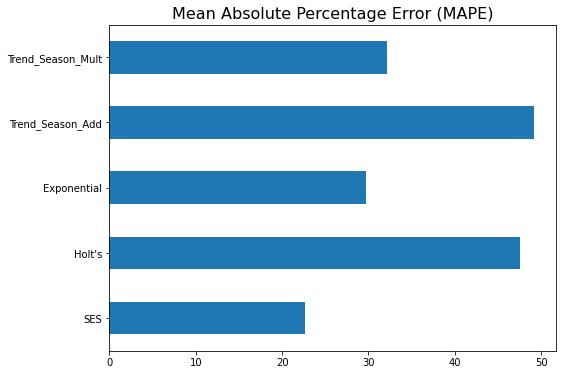

In [159]:
# horizontal bar chart
eval_all_df.loc['MAPE', :].plot(kind='barh', figsize=[8, 6])
plt.title('Mean Absolute Percentage Error (MAPE)', fontsize=16)
plt.show()

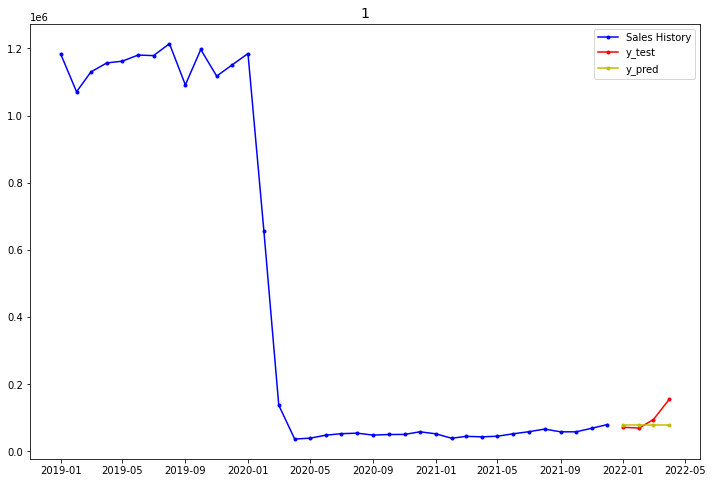

In [165]:
# forcst_1
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_1, 'y.-', label='y_pred')
plt.title('1', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

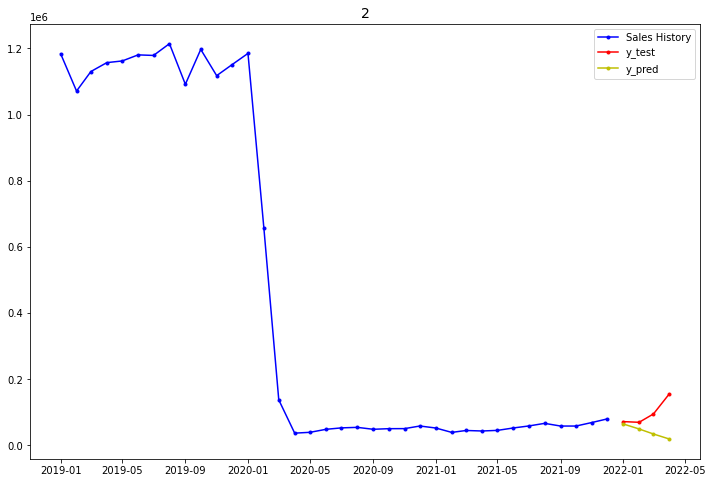

In [166]:
# forcst_2
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_2, 'y.-', label='y_pred')
plt.title('2', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

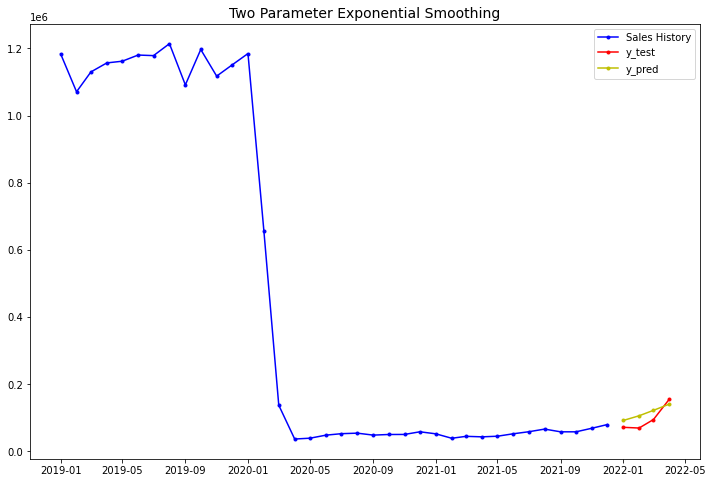

In [167]:
# 1차 선형 추세는 있고 계절성은 없는 이중 지수 평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_3, 'y.-', label='y_pred')
plt.title('Two Parameter Exponential Smoothing', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

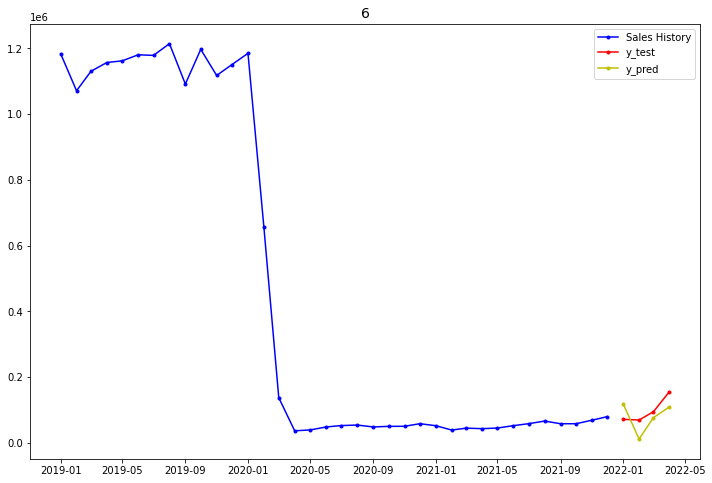

In [168]:
# forcsat_6
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_6, 'y.-', label='y_pred')
plt.title('6', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()

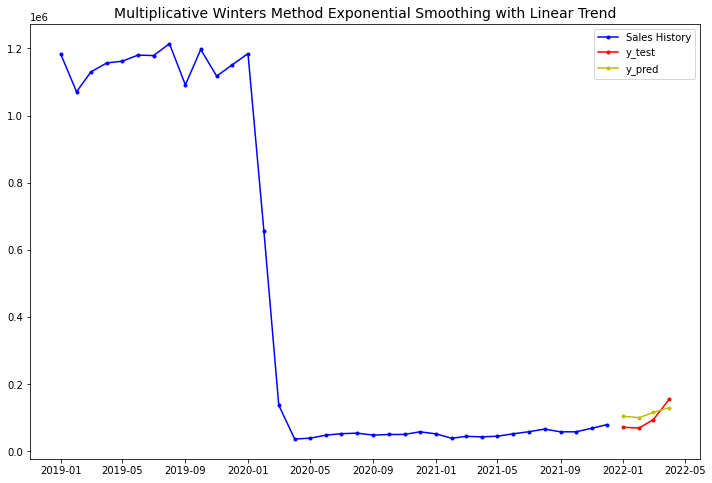

In [169]:
# 1차 선형 추세와 확산계절변동이 있는 승법 윈터스 지수평활법
plt.rcParams['figure.figsize']=[12, 8]
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
test, = plt.plot(df_test.index, df_test, 'r.-', label='y_test')
pred, = plt.plot(df_test.index, forecast_7, 'y.-', label='y_pred')
plt.title('Multiplicative Winters Method Exponential Smoothing with Linear Trend', fontsize=14)
plt.legend(handles=[past, test, pred])
plt.show()